# Experiment 1 #
With consumption last week vs without

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
RANDOM_SEED = 142
from pycaret.regression import *




In [16]:
# load dataset
pd_data = pd.read_csv("preprocessed_data.csv")

#TODO drop Helsingfors

pd_data.drop(columns="season", inplace=True)
pd_data['time'] = pd.to_datetime(pd_data['time'])

In [17]:
pd_data.describe()

,time,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos
count,49494,49494.000000,49494.000000,4.949400e+04,4.949400e+04,4.949400e+04,4.949400e+04,49494.000000,49494.000000
mean,2022-10-11 02:25:46.223784704,3.509242,6.554019,-1.170961e-04,3.137581e-05,5.610982e-03,-2.965490e-03,-0.039578,0.034882
min,2022-04-07 21:00:00,0.000000,-17.299999,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000
25%,2022-07-19 03:00:00,1.263256,1.000000,-7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-0.738660,-0.677781
50%,2022-10-13 01:00:00,2.376530,6.800000,1.502728e-14,6.386783e-14,9.808024e-13,-5.667275e-13,-0.081229,0.092330
75%,2023-01-06 23:00:00,5.189000,12.100000,7.071068e-01,7.071068e-01,7.071068e-01,7.071068e-01,0.663181,0.738919
max,2023-04-02 21:00:00,18.045011,30.500000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000
std,NaN,3.096356,7.630308,7.071510e-01,7.070768e-01,7.073498e-01,7.068494e-01,0.703787,0.708464


## Add consumption last week feature ##

In [18]:
pd_data['consumption_last_week'] = pd_data['consumption'].shift(7)


In [19]:
pd_data.head()

,time,location,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
1,2022-04-07 21:00:00,oslo,4.092830,1.0,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN


In [20]:
pd_data[pd_data["consumption_last_week"].isna()].describe()

,time,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
count,7,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.0
mean,2022-04-07 21:17:08.571428608,2.192731,-0.614286,-0.937383,0.327728,0.660255,0.750852,0.994883,-0.101030,NaN
min,2022-04-07 21:00:00,1.050327,-3.900000,-0.965926,0.258819,0.652287,0.733052,0.994831,-0.101540,NaN
25%,2022-04-07 21:00:00,1.179953,-1.550000,-0.965926,0.258819,0.652287,0.745512,0.994868,-0.101183,NaN
50%,2022-04-07 21:00:00,1.970098,0.000000,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
75%,2022-04-07 21:30:00,2.937977,0.700000,-0.915976,0.379410,0.666230,0.757972,0.994904,-0.100827,NaN
max,2022-04-07 22:00:00,4.092830,1.300000,-0.866025,0.500000,0.680173,0.757972,0.994904,-0.100827,NaN
std,NaN,1.270521,1.972670,0.048746,0.117684,0.013607,0.012160,0.000035,0.000348,NaN


In [21]:
pd_data.to_csv("experiment1_data.csv")

# Split into test and train data for each location #

In [22]:
# Make split on each location

# TODO MUST MAKE DATA FOR EACH LOCATION
def select_location(dataset, location):
    dataset = pd_data[pd_data["location"] == location].reset_index().drop(columns= ["index", "location"])
    return dataset

oslo = select_location(pd_data, "oslo")
bergen = select_location(pd_data, "bergen")
trondheim = select_location(pd_data, "trondheim")
tromsø = select_location(pd_data, "tromsø")
stavanger = select_location(pd_data, "stavanger")






#pd_data.describe()
oslo.head()

,time,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
0,2022-04-07 21:00:00,4.092830,1.0,-0.965926,0.258819,0.652287,0.757972,0.994904,-0.100827,NaN
1,2022-04-07 22:00:00,3.818095,0.4,-0.866025,0.500000,0.680173,0.733052,0.994831,-0.101540,NaN
2,2022-04-07 23:00:00,3.660981,0.3,-0.707107,0.707107,0.707107,0.707107,0.994758,-0.102253,1.970098
3,2022-04-08 00:00:00,3.584066,0.2,-0.500000,0.866025,0.733052,0.680173,0.994685,-0.102966,1.839443
4,2022-04-08 01:00:00,3.549536,0.4,-0.258819,0.965926,0.757972,0.652287,0.994611,-0.103679,1.747675


In [23]:
pd_data.head(-10)

,time,location,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
1,2022-04-07 21:00:00,oslo,4.092830,1.0,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,-0.965926,2.588190e-01,0.652287,0.757972,0.994904,-0.100827,NaN
...,...,...,...,...,...,...,...,...,...,...,...
49479,2023-04-02 19:00:00,stavanger,6.060454,2.8,-0.965926,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,12.856381
49480,2023-04-02 19:00:00,tromsø,2.095099,-2.3,-0.965926,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,6.052910
49481,2023-04-02 19:00:00,trondheim,4.093120,1.4,-0.965926,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,2.084384
49482,2023-04-02 20:00:00,bergen,3.328194,2.5,-1.000000,-6.165360e-12,-0.222521,-0.974928,0.999949,-0.010096,4.067940


In [24]:


# Extract unseen data to compare with final model
def split_test_train(dataset):
    # Calculate the index at which to split
    # split_index = int(len(dataset) -46) used when test was only last 24 hours
    split_index = int(len(dataset) * 0.8) 

    # Split into training and testing sets
    train_df = dataset.iloc[:split_index]
    test_df = dataset.iloc[split_index:] 

    return train_df, test_df


oslo_train, oslo_test = split_test_train(oslo)
bergen_train, bergen_test = split_test_train(bergen)
trondheim_train, trondheim_test = split_test_train(trondheim)
tromsø_train, tromsø_test = split_test_train(tromsø)
stavanger_train, stavanger_test = split_test_train(stavanger)

stavanger_test

,time,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
6912,2023-01-20 21:00:00,7.201020,-5.6,-8.660254e-01,5.000000e-01,0.997204,-0.074730,0.336997,0.941506,14.965746
6913,2023-01-20 22:00:00,7.150055,-5.4,-7.071068e-01,7.071068e-01,0.993712,-0.111964,0.337672,0.941264,14.766486
6914,2023-01-20 23:00:00,6.976293,-5.1,-5.000000e-01,8.660254e-01,0.988831,-0.149042,0.338347,0.941022,14.572231
6915,2023-01-21 00:00:00,6.884066,-5.1,-2.588190e-01,9.659258e-01,0.982566,-0.185912,0.339021,0.940779,14.215177
6916,2023-01-21 01:00:00,6.793396,-4.8,-1.263327e-11,1.000000e+00,0.974928,-0.222521,0.339695,0.940536,13.942359
...,...,...,...,...,...,...,...,...,...,...
8636,2023-04-02 17:00:00,5.676252,5.8,-7.071068e-01,-7.071068e-01,-0.111964,-0.993712,0.999968,-0.007945,11.643800
8637,2023-04-02 18:00:00,6.052910,4.6,-8.660254e-01,-5.000000e-01,-0.149042,-0.988831,0.999962,-0.008662,12.410225
8638,2023-04-02 19:00:00,6.060454,2.8,-9.659258e-01,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,12.856381
8639,2023-04-02 20:00:00,5.875634,1.4,-1.000000e+00,-6.165360e-12,-0.222521,-0.974928,0.999949,-0.010096,13.010338


# Experiment 1: Pv_measurement from last week as a feature #

In [25]:
location_train_dict = {"oslo": oslo_train, "trondheim": trondheim_train, "tromsø": tromsø_train, "stavanger": stavanger_train, "bergen": bergen_train}
location_test_dict = {"oslo": oslo_test, "trondheim": trondheim_test, "tromsø": tromsø_test, "stavanger": stavanger_test, "bergen": bergen_test}


In [26]:
location_train_dict.keys()

dict_keys(['oslo', 'trondheim', 'tromsø', 'stavanger', 'bergen'])

### Running models with the extra feature ###

In [27]:
best_models = {}
model_comparisons = {}

for location in location_train_dict:
    location_train = location_train_dict[location]
    location_test = location_test_dict[location]

    print("\n---------------", location, "---------------\n")


    # Setup PyCaret environment for the current location
    s = setup(data=location_train, test_data=location_test, target='consumption',
              fold_strategy = 'timeseries', data_split_shuffle = False, fold_shuffle = False, session_id=123)
    
    # Compare models
    best = compare_models(sort='MAE')  
    model_comparisons[location] = pull()  # Pull the model comparison results for later referance

    # Tune and finalize model #TODO not added yet to save time
    # best = tune_model(best, optimize = "MAE",  n_iter=10) Not necessary - original model performs better at 10 iterations so save the time
    best = finalize_model(best)

    # Store the best model
    best_models[location] = best


# model_comparisons now contains comparison data for each location
# best_models contains the best model for each location


--------------- oslo ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 10)"
4,Transformed data shape,"(8641, 12)"
5,Transformed train set shape,"(6912, 12)"
6,Transformed test set shape,"(1729, 12)"
7,Numeric features,8
8,Date features,1
9,Rows with missing values,0.0%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.9105,2.3831,1.1036,-0.1383,0.1406,0.1279,0.1250
ada,AdaBoost Regressor,0.9301,2.2337,1.1348,-0.2267,0.1494,0.1384,0.0600
rf,Random Forest Regressor,0.9532,2.4497,1.1623,-0.3830,0.1539,0.1367,0.2760
lightgbm,Light Gradient Boosting Machine,0.9573,2.4868,1.1580,-0.3405,0.1526,0.1360,0.7850
dt,Decision Tree Regressor,1.0054,2.5903,1.2337,-0.6471,0.1684,0.1493,0.0140
et,Extra Trees Regressor,1.2035,3.9094,1.4227,-0.6200,0.1692,0.1517,0.1550
knn,K Neighbors Regressor,2.0223,11.1555,2.2905,-4.0982,0.3263,0.2704,0.0200
ridge,Ridge Regression,2.0435,24.9748,2.3732,-8.7298,0.2171,0.2505,0.0090
lr,Linear Regression,2.0452,25.0432,2.3736,-8.4246,0.2214,0.2479,0.3220
br,Bayesian Ridge,2.0519,25.0274,2.3843,-8.5018,0.2256,0.2499,0.0210



--------------- trondheim ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 10)"
4,Transformed data shape,"(8641, 12)"
5,Transformed train set shape,"(6912, 12)"
6,Transformed test set shape,"(1729, 12)"
7,Numeric features,8
8,Date features,1
9,Rows with missing values,0.0%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1937,0.0726,0.2451,0.2992,0.0790,0.1009,0.7980
gbr,Gradient Boosting Regressor,0.1942,0.0756,0.2461,0.3311,0.0783,0.0992,0.1330
rf,Random Forest Regressor,0.2055,0.0802,0.2554,0.2320,0.0826,0.1088,0.2810
ada,AdaBoost Regressor,0.2267,0.0978,0.2827,0.0830,0.0910,0.1184,0.0670
dt,Decision Tree Regressor,0.2328,0.0955,0.2871,-0.0114,0.0951,0.1261,0.0140
et,Extra Trees Regressor,0.2769,0.1716,0.3362,-0.1306,0.1011,0.1250,0.1840
huber,Huber Regressor,0.3821,0.4997,0.4442,-1.7414,0.1423,0.1563,0.0210
ridge,Ridge Regression,0.3953,0.6323,0.4659,-2.4904,0.1571,0.1694,0.0090
knn,K Neighbors Regressor,0.5000,0.6299,0.5921,-2.7705,0.1890,0.2117,0.0170
par,Passive Aggressive Regressor,0.5150,0.5012,0.5706,-2.2027,0.1817,0.2207,0.0190



--------------- tromsø ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 10)"
4,Transformed data shape,"(8641, 12)"
5,Transformed train set shape,"(6912, 12)"
6,Transformed test set shape,"(1729, 12)"
7,Numeric features,8
8,Date features,1
9,Rows with missing values,0.0%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1229,0.0282,0.1501,0.1646,0.0667,0.1066,0.1450
lightgbm,Light Gradient Boosting Machine,0.1236,0.0299,0.1495,0.1203,0.0671,0.1083,0.8210
rf,Random Forest Regressor,0.1316,0.0335,0.1587,0.0100,0.0713,0.1158,0.2610
ada,AdaBoost Regressor,0.1427,0.0362,0.1719,-0.1656,0.0780,0.1303,0.0670
ridge,Ridge Regression,0.1435,0.0316,0.1677,-0.2280,0.0769,0.1331,0.0090
et,Extra Trees Regressor,0.1451,0.0392,0.1737,-0.1269,0.0765,0.1243,0.1580
dt,Decision Tree Regressor,0.1478,0.0406,0.1827,-0.2992,0.0828,0.1314,0.0180
huber,Huber Regressor,0.1616,0.0478,0.1843,-0.5131,0.0814,0.1344,0.0160
lr,Linear Regression,0.1803,0.0483,0.2079,-1.4401,0.1008,0.1837,0.0170
br,Bayesian Ridge,0.1823,0.0474,0.2108,-1.2915,0.1017,0.1863,0.0150



--------------- stavanger ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 10)"
4,Transformed data shape,"(8641, 12)"
5,Transformed train set shape,"(6912, 12)"
6,Transformed test set shape,"(1729, 12)"
7,Numeric features,8
8,Date features,1
9,Rows with missing values,0.0%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2536,0.1909,0.3436,0.3558,0.0839,0.0913,0.1270
rf,Random Forest Regressor,0.2612,0.1952,0.3516,0.3080,0.0869,0.0952,0.2910
lightgbm,Light Gradient Boosting Machine,0.2718,0.2111,0.3656,0.2722,0.0905,0.0980,0.7850
dt,Decision Tree Regressor,0.2820,0.2115,0.3694,0.2978,0.0909,0.1024,0.0160
ada,AdaBoost Regressor,0.2891,0.2428,0.3828,0.2775,0.0916,0.0994,0.0630
et,Extra Trees Regressor,0.3185,0.2863,0.4150,0.2251,0.0938,0.0991,0.1580
huber,Huber Regressor,0.3613,0.2329,0.4192,-0.6503,0.1178,0.1475,0.0150
ridge,Ridge Regression,0.3897,0.3362,0.4825,-2.5090,0.1348,0.1703,0.0130
br,Bayesian Ridge,0.4185,0.3412,0.5065,-2.2571,0.1571,0.1897,0.0100
lr,Linear Regression,0.4248,0.3444,0.5123,-2.2692,0.1599,0.1946,0.0130



--------------- bergen ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 10)"
4,Transformed data shape,"(8641, 12)"
5,Transformed train set shape,"(6912, 12)"
6,Transformed test set shape,"(1729, 12)"
7,Numeric features,8
8,Date features,1
9,Rows with missing values,0.0%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1645,0.0654,0.2109,0.3364,0.0747,0.0995,0.1340
rf,Random Forest Regressor,0.1710,0.0689,0.2197,0.2730,0.0782,0.1038,0.2750
lightgbm,Light Gradient Boosting Machine,0.1804,0.0763,0.2265,0.2160,0.0810,0.1087,1.0460
ada,AdaBoost Regressor,0.1856,0.0798,0.2351,0.1756,0.0834,0.1113,0.0600
dt,Decision Tree Regressor,0.1892,0.0797,0.2397,0.1508,0.0873,0.1180,0.0190
et,Extra Trees Regressor,0.2344,0.1359,0.2872,-0.0316,0.0950,0.1217,0.1700
huber,Huber Regressor,0.3940,0.4242,0.4509,-2.0563,0.1568,0.1945,0.0150
ridge,Ridge Regression,0.3957,0.6229,0.4580,-3.8700,0.1838,0.2212,0.0110
lr,Linear Regression,0.4126,0.6298,0.4774,-3.8520,0.1931,0.2371,0.0170
br,Bayesian Ridge,0.4267,0.6394,0.4931,-4.6745,0.2042,0.2565,0.0080


### Running models WITHOUT the extra feature ###

In [28]:
oslo_train_wo_lastweek = oslo_train.drop(columns="consumption_last_week")
trondheim_train_wo_lastweek = trondheim_train.drop(columns="consumption_last_week")
tromsø_train_wo_lastweek = tromsø_train.drop(columns="consumption_last_week")
stavanger_train_wo_lastweek = stavanger_train.drop(columns="consumption_last_week")
bergen_train_wo_lastweek = bergen_train.drop(columns="consumption_last_week")

oslo_test_wo_lastweek = oslo_test.drop(columns="consumption_last_week")
trondheim_test_wo_lastweek = trondheim_test.drop(columns="consumption_last_week")
tromsø_test_wo_lastweek = tromsø_test.drop(columns="consumption_last_week")
stavanger_test_wo_lastweek = stavanger_test.drop(columns="consumption_last_week")
bergen_test_wo_lastweek = bergen_test.drop(columns="consumption_last_week")


location_train_dict_wo_lastweek = {"oslo": oslo_train_wo_lastweek, "trondheim": trondheim_train_wo_lastweek, "tromsø": tromsø_train_wo_lastweek,
                                   "stavanger": stavanger_train_wo_lastweek, "bergen": bergen_train_wo_lastweek}

location_test_dict_wo_lastweek = {"oslo": oslo_test_wo_lastweek, "trondheim": trondheim_test_wo_lastweek, "tromsø": tromsø_test_wo_lastweek,
                                   "stavanger": stavanger_test_wo_lastweek, "bergen": bergen_test_wo_lastweek}
best_models_wo_lastweek = {}
model_comparisons_wo_lastweek = {}

for location in location_train_dict_wo_lastweek:
    location_train = location_train_dict_wo_lastweek[location]
    location_test = location_test_dict_wo_lastweek[location]

    print("\n---------------", location, "---------------\n")


    # Setup PyCaret environment for the current location
    s = setup(data=location_train, test_data=location_test, target='consumption',
              fold_strategy = 'timeseries', data_split_shuffle = False, fold_shuffle = False, session_id=123)
    
    # Compare models
    best = compare_models(sort='MAE')  # TODO Correct metric?
    model_comparisons_wo_lastweek[location] = pull()  # Pull the model comparison results for later referance

    # Tune and finalize model #TODO not added yet to save time
    # best = tune_model(best, optimize = "MAE", n_iter=10) Not necessary - original model performs better at 10 iterations so save the time
    best = finalize_model(best)

    # Store the best model
    best_models_wo_lastweek[location] = best



--------------- oslo ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 9)"
4,Transformed data shape,"(8641, 11)"
5,Transformed train set shape,"(6912, 11)"
6,Transformed test set shape,"(1729, 11)"
7,Numeric features,7
8,Date features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.9136,2.3965,1.1009,-0.1147,0.1396,0.1274,0.1060
ada,AdaBoost Regressor,0.9211,2.2001,1.1226,-0.2172,0.1486,0.1386,0.0540
rf,Random Forest Regressor,0.9529,2.4526,1.1642,-0.3885,0.1546,0.1369,0.2680
lightgbm,Light Gradient Boosting Machine,0.9786,2.5659,1.1770,-0.3996,0.1568,0.1401,0.8190
dt,Decision Tree Regressor,1.0359,2.7202,1.2608,-0.7389,0.1759,0.1547,0.0200
et,Extra Trees Regressor,1.2470,4.2704,1.4720,-0.7661,0.1755,0.1564,0.1390
huber,Huber Regressor,1.8557,11.2009,2.1027,-3.6853,0.3074,0.2320,0.0170
ridge,Ridge Regression,2.0231,24.8910,2.3428,-8.3570,0.2114,0.2423,0.0140
knn,K Neighbors Regressor,2.0474,11.4061,2.3170,-4.2246,0.3325,0.2748,0.0190
br,Bayesian Ridge,2.1429,25.2135,2.4815,-10.4377,0.2487,0.2919,0.0220



--------------- trondheim ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 9)"
4,Transformed data shape,"(8641, 11)"
5,Transformed train set shape,"(6912, 11)"
6,Transformed test set shape,"(1729, 11)"
7,Numeric features,7
8,Date features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2324,0.1129,0.2833,0.1334,0.0884,0.1122,0.1040
ada,AdaBoost Regressor,0.2347,0.1137,0.2909,0.0984,0.0916,0.1163,0.0550
rf,Random Forest Regressor,0.2422,0.1175,0.2974,-0.0423,0.0949,0.1224,0.2450
lightgbm,Light Gradient Boosting Machine,0.2648,0.1328,0.3180,-0.2025,0.1023,0.1345,0.7080
dt,Decision Tree Regressor,0.2776,0.1444,0.3347,-0.4453,0.1103,0.1439,0.0120
et,Extra Trees Regressor,0.3093,0.2244,0.3686,-0.3640,0.1096,0.1331,0.1340
ridge,Ridge Regression,0.4003,0.7742,0.4691,-2.8524,0.1613,0.1566,0.0090
huber,Huber Regressor,0.4150,0.5589,0.4780,-2.0049,0.1533,0.1659,0.0190
knn,K Neighbors Regressor,0.5029,0.6344,0.5946,-2.7942,0.1899,0.2127,0.0110
par,Passive Aggressive Regressor,0.5158,0.5030,0.5714,-2.2098,0.1819,0.2209,0.0110



--------------- tromsø ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 9)"
4,Transformed data shape,"(8641, 11)"
5,Transformed train set shape,"(6912, 11)"
6,Transformed test set shape,"(1729, 11)"
7,Numeric features,7
8,Date features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1393,0.0378,0.1663,-0.0543,0.0738,0.1175,0.7150
rf,Random Forest Regressor,0.1413,0.0393,0.1682,-0.0722,0.0747,0.1183,0.2290
gbr,Gradient Boosting Regressor,0.1447,0.0395,0.1706,-0.0922,0.0751,0.1199,0.1130
dt,Decision Tree Regressor,0.1460,0.0424,0.1763,-0.1665,0.0786,0.1218,0.0150
ada,AdaBoost Regressor,0.1541,0.0422,0.1822,-0.2578,0.0818,0.1352,0.0570
et,Extra Trees Regressor,0.1683,0.0529,0.1978,-0.4312,0.0862,0.1376,0.1410
ridge,Ridge Regression,0.1864,0.0956,0.2154,-1.6254,0.0949,0.1430,0.0190
huber,Huber Regressor,0.1913,0.0967,0.2226,-1.6322,0.0998,0.1466,0.0160
br,Bayesian Ridge,0.1985,0.1014,0.2312,-1.9918,0.1052,0.1580,0.0070
lr,Linear Regression,0.2142,0.1079,0.2493,-2.2897,0.1147,0.1797,0.0180



--------------- stavanger ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 9)"
4,Transformed data shape,"(8641, 11)"
5,Transformed train set shape,"(6912, 11)"
6,Transformed test set shape,"(1729, 11)"
7,Numeric features,7
8,Date features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4001,0.4281,0.5036,-0.0549,0.1139,0.1214,0.2550
gbr,Gradient Boosting Regressor,0.4111,0.4481,0.5061,-0.0530,0.1128,0.1210,0.1060
lightgbm,Light Gradient Boosting Machine,0.4153,0.4394,0.5089,-0.0901,0.1167,0.1256,0.7510
ada,AdaBoost Regressor,0.4180,0.4579,0.5180,-0.1148,0.1175,0.1255,0.0520
dt,Decision Tree Regressor,0.4453,0.4938,0.5510,-0.3203,0.1295,0.1429,0.0120
et,Extra Trees Regressor,0.5539,0.8550,0.6597,-0.8690,0.1413,0.1435,0.1340
par,Passive Aggressive Regressor,0.8598,1.6931,0.9514,-4.2666,0.2560,0.2862,0.0100
knn,K Neighbors Regressor,0.9828,2.6557,1.1295,-5.7069,0.2865,0.2685,0.0110
ridge,Ridge Regression,1.0148,5.4795,1.1703,-12.3530,0.2067,0.2734,0.0080
omp,Orthogonal Matching Pursuit,1.0372,2.3274,1.1191,-4.4787,0.2688,0.2828,0.0070



--------------- bergen ---------------



,Description,Value
0,Session id,123
1,Target,consumption
2,Target type,Regression
3,Original data shape,"(8641, 9)"
4,Transformed data shape,"(8641, 11)"
5,Transformed train set shape,"(6912, 11)"
6,Transformed test set shape,"(1729, 11)"
7,Numeric features,7
8,Date features,1
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2172,0.1132,0.2652,-0.0074,0.0920,0.1205,0.1070
ada,AdaBoost Regressor,0.2302,0.1243,0.2797,-0.0748,0.0966,0.1267,0.0590
lightgbm,Light Gradient Boosting Machine,0.2328,0.1255,0.2807,-0.1858,0.0992,0.1308,0.7960
rf,Random Forest Regressor,0.2331,0.1294,0.2860,-0.3661,0.1027,0.1319,0.2560
dt,Decision Tree Regressor,0.2540,0.1494,0.3146,-0.6953,0.1160,0.1484,0.0130
et,Extra Trees Regressor,0.3143,0.2645,0.3697,-0.6907,0.1202,0.1486,0.1380
par,Passive Aggressive Regressor,0.4612,0.4395,0.5165,-3.1969,0.2012,0.2767,0.0110
huber,Huber Regressor,0.4961,0.9102,0.5708,-4.5603,0.2168,0.2262,0.0190
knn,K Neighbors Regressor,0.5267,0.7573,0.6061,-4.1455,0.2224,0.2567,0.0120
ridge,Ridge Regression,0.5354,1.4928,0.6180,-7.8541,0.1778,0.2564,0.0080


In [29]:
oslo_test.head()

,time,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
6912,2023-01-20 21:00:00,14.766486,-12.5,-8.660254e-01,0.500000,0.997204,-0.074730,0.336997,0.941506,6.470
6913,2023-01-20 22:00:00,14.572231,-13.1,-7.071068e-01,0.707107,0.993712,-0.111964,0.337672,0.941264,6.482
6914,2023-01-20 23:00:00,14.215177,-13.0,-5.000000e-01,0.866025,0.988831,-0.149042,0.338347,0.941022,6.463
6915,2023-01-21 00:00:00,13.942359,-13.2,-2.588190e-01,0.965926,0.982566,-0.185912,0.339021,0.940779,6.432
6916,2023-01-21 01:00:00,13.801610,-13.1,-1.263327e-11,1.000000,0.974928,-0.222521,0.339695,0.940536,6.438


## Predict with all models and print MAE ##

In [30]:
# Prediction for models WITH last week


# Store all models with name for easier handling
best_models_dict = {}
i = 0

for location in location_test_dict:
    best_models_dict[location] = best_models[location]


#Store for easy plotting
plot_predictions = []
plot_actuals = []


predictions_with_lastweek = {}
for location in location_test_dict: 
    test = location_test_dict[location]
    test_X = test.drop(columns="consumption")
    test_y = test[["consumption", "time"]]


    model = best_models_dict[location]

    pred_y = predict_model(model, data = test_X)

    pred_y = pred_y[["prediction_label", "time"]]
    pred_y = pred_y.rename(columns={"prediction_label": "consumption"})
    plot_predictions.append(pred_y)
    plot_actuals.append(test_y)
    
    predictions_with_lastweek[location] = pred_y

In [31]:
# Prediction for models WO last week

# Store all models with name for easier handling
best_models_wo_lastweek_dict = {}

for location in location_test_dict:
    best_models_wo_lastweek_dict[location] = best_models_wo_lastweek[location]


predictions_wo_lastweek = {}
for location in location_test_dict: 
    test = location_test_dict[location]
    test_X = test.drop(columns=["consumption", "consumption_last_week"])
    test_y = test[["consumption", "time"]]

    model = best_models_wo_lastweek_dict[location]

    pred_y = predict_model(model, data = test_X)
    predictions_wo_lastweek[location] = pred_y

In [32]:
#Print all MAE in a table 

from sklearn.metrics import mean_absolute_error

MAE_df = pd.DataFrame(columns = ["location", "MAE with last_week_consumption", "MAE w/o last_week_consumption", "MAE baseline"])

i = 0
for location in predictions_with_lastweek:
    prediction_with_lastweek = predictions_with_lastweek[location]["consumption"]
    prediction_wo_lastweek = predictions_wo_lastweek[location]["prediction_label"] 

    actual = location_test_dict[location][["consumption", "consumption_last_week"]]

    MAE_with_lastweek = round(mean_absolute_error(actual["consumption"],prediction_with_lastweek), 3)
    MAE_wo_lastweek = round(mean_absolute_error(actual["consumption"],prediction_wo_lastweek), 3)
    MAE_baseline = round(mean_absolute_error(actual["consumption"], actual["consumption_last_week"]), 3)

    MAE_df.loc[i]= [location, MAE_with_lastweek, MAE_wo_lastweek, MAE_baseline]
    i+=1

MAE_df


,location,MAE with last_week_consumption,MAE w/o last_week_consumption,MAE baseline
0,oslo,0.430,0.431,5.782
1,trondheim,0.065,0.126,1.682
2,tromsø,0.060,0.031,3.712
3,stavanger,0.143,0.048,6.558
4,bergen,0.127,0.126,0.444


Key takeaway: better with last week consumotion than without

In [33]:
MAE_df.to_csv("Table Conclusion Experiment 1.csv")
# (MAE_df.drop(columns=["MAE w/o last_week_consumption", "MAE baseline"])).to_csv("Tables for chap. 4/MAE_locationmodels.csv")

In [34]:
# SAve preferred models
# Extract the minimum value from the MAE columns for each location
MAE_df['min_MAE'] = MAE_df[['MAE with last_week_consumption', 'MAE w/o last_week_consumption', 'MAE baseline']].min(axis=1)

# Create a new dataframe with the location and the corresponding minimum MAE value
result_df = MAE_df[['location', 'min_MAE']]
result_df["model"] = ["GBR", "lightGBM", "lightGBM", "random forest", "GBR"]
result_df["last_week_consumption"] = ["yes", "yes", "no", "no", "no"]
result_df.to_csv("MAE_best_locationmodels.csv")
MAE_df.drop(columns="min_MAE", inplace=True)
MAE_df.to_csv("MAE_all_locationmodels.csv")

### Plot all predictions ###

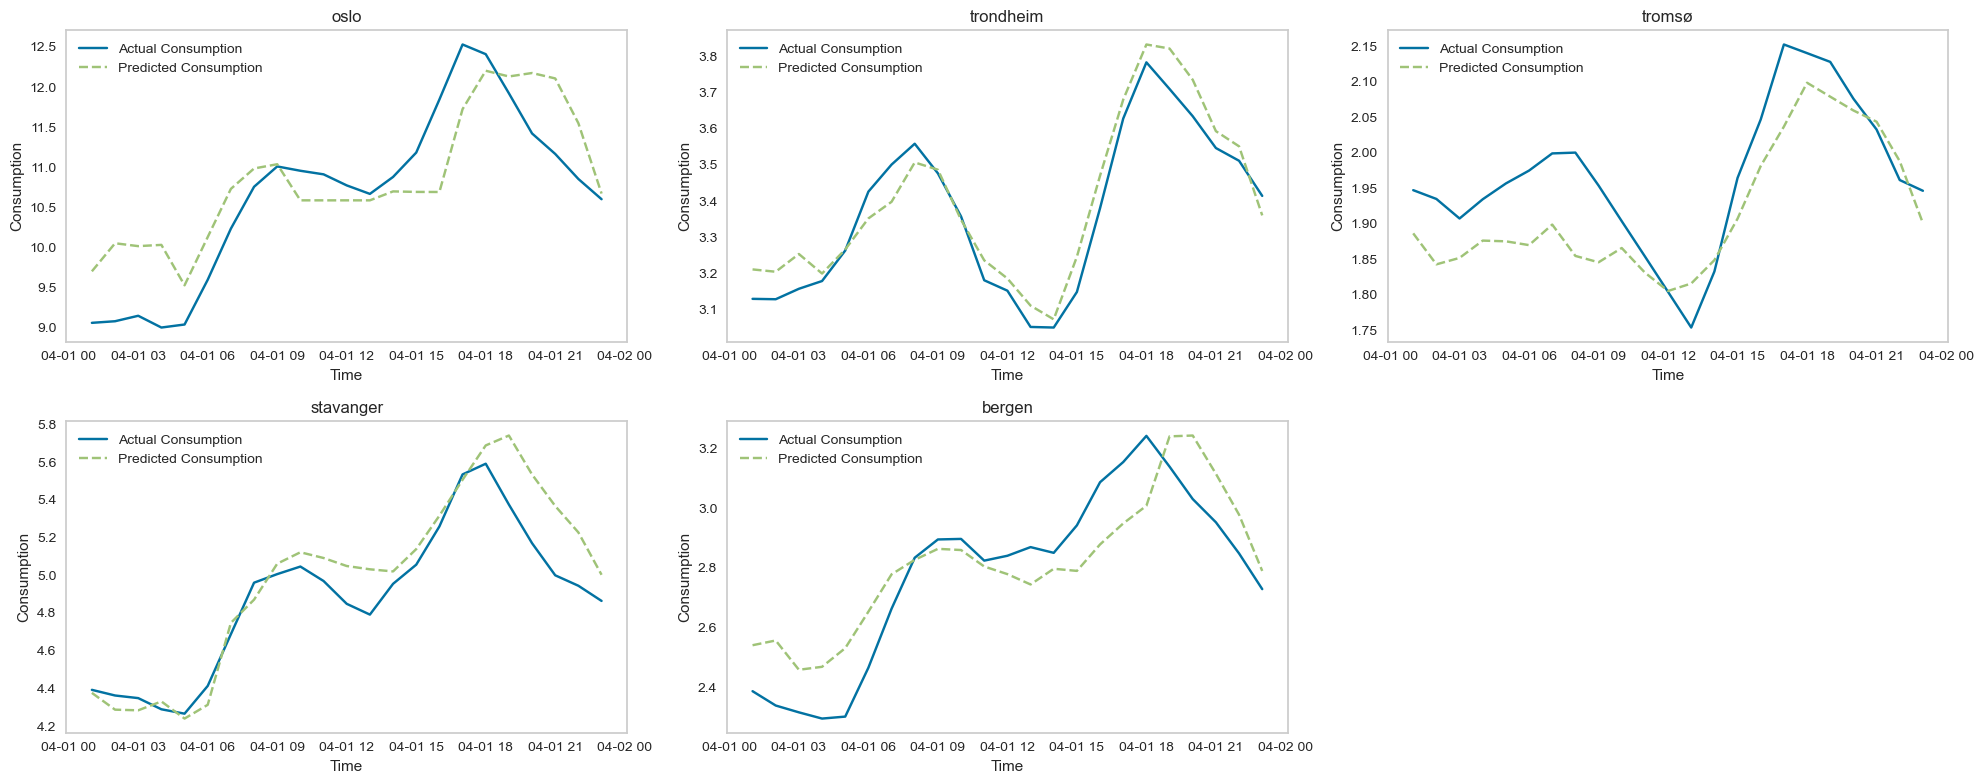

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8)) # Create a subplot of 2 rows and 3 columns with a suitable figure size

i = 0
for location in location_test_dict: 
    prediction_with_lastweek_24hr = predictions_with_lastweek[location][-45:-22]
    prediction_wo_lastweek_24hr = predictions_wo_lastweek[location][-45:-22]
    actual = location_test_dict[location][["consumption", "consumption_last_week", "time"]][-45:-22] #To have the predictions in the right format, from 00:00 to 23:00, we leave out the last 21 entries

    
    # Map the index i to the appropriate row and column for the subplot
    row = i // 3
    col = i % 3

    ax = axes[row, col]  # Use the appropriate axis for this plot
    ax.plot(actual["time"], actual["consumption"], label="Actual Consumption")
    ax.plot(prediction_with_lastweek_24hr["time"], prediction_with_lastweek_24hr["consumption"], label="Predicted Consumption", linestyle="--")
    #ax.plot(prediction_wo_lastweek["time"], prediction_wo_lastweek["prediction_label"], label="Predicted Consumption", linestyle="-")
    # ax.plot(test_y["time"], actual["consumption_last_week"], label="Last week Consumption")


    ax.set_xlabel('Time')
    ax.set_ylabel('Consumption')
    ax.legend()
    ax.set_title(location)
    ax.grid(False)
    i += 1

# Hide any unused subplot (in this case, the last one)
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()  
plt.show()


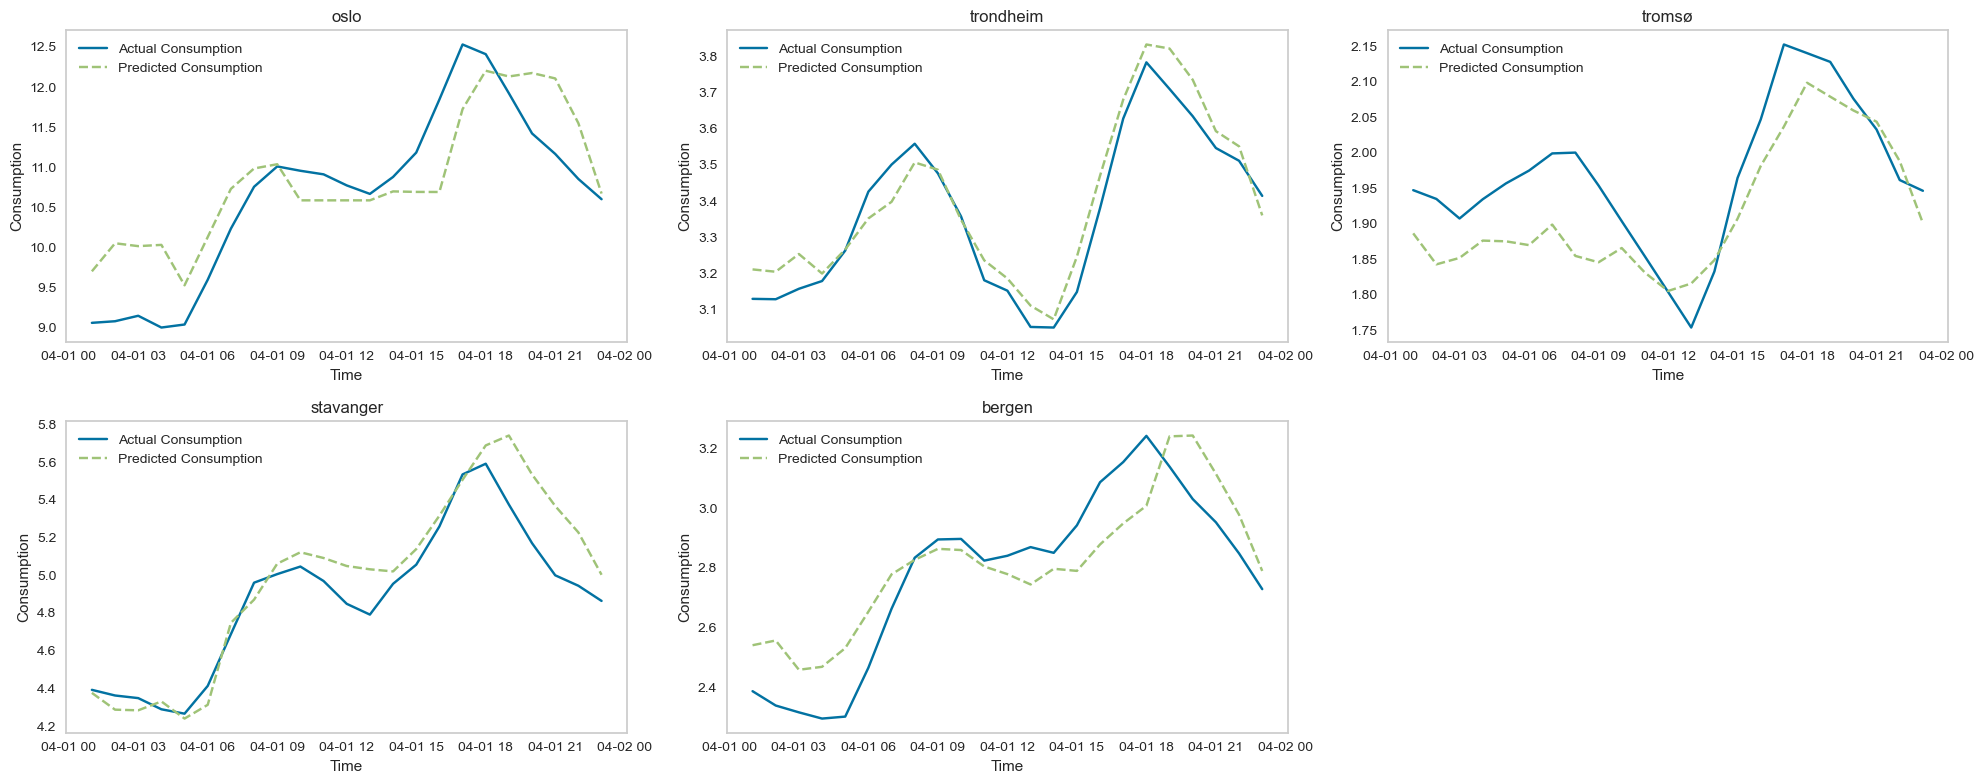

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))  # Create a subplot of 2 rows and 3 columns with a suitable figure size

i = 0
for location in location_test_dict:
    if i > 4:  # Skip if more than 5 locations to ensure only 5 plots are made
        break

    prediction_with_lastweek_24hr = predictions_with_lastweek[location][-45:-22]
    prediction_wo_lastweek_24hr = predictions_wo_lastweek[location][-45:-22]
    actual = location_test_dict[location][["consumption", "consumption_last_week", "time"]][-45:-22]

    # Map the index i to the appropriate row and column for the subplot
    row = i // 3
    col = i % 3

    ax = axes[row, col]  # Use the appropriate axis for this plot
    ax.plot(actual["time"], actual["consumption"], label="Actual Consumption")
    ax.plot(prediction_with_lastweek_24hr["time"], prediction_with_lastweek_24hr["consumption"], label="Predicted Consumption", linestyle="--")

    ax.set_xlabel('Time')
    ax.set_ylabel('Consumption')
    ax.legend()
    ax.set_title(location)
    ax.grid(False)
    i += 1

# Hide any unused subplot (in this case, the last one)
axes[1, 2].axis('off')

# Adjust layout to prevent overlapping of subplot titles and labels
plt.tight_layout()
plt.show()


In [46]:
trondheim_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 6912 to 8640
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   1729 non-null   datetime64[ns]
 1   consumption            1729 non-null   float64       
 2   temperature            1729 non-null   float64       
 3   day_sin                1729 non-null   float64       
 4   day_cos                1729 non-null   float64       
 5   week_sin               1729 non-null   float64       
 6   week_cos               1729 non-null   float64       
 7   year_sin               1729 non-null   float64       
 8   year_cos               1729 non-null   float64       
 9   consumption_last_week  1729 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 135.2 KB


In [64]:
trondheim_test

,time,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
6912,2023-01-20 21:00:00,4.006104,-0.6,-8.660254e-01,5.000000e-01,0.997204,-0.074730,0.336997,0.941506,1.992874
6913,2023-01-20 22:00:00,3.897353,-0.2,-7.071068e-01,7.071068e-01,0.993712,-0.111964,0.337672,0.941264,1.958859
6914,2023-01-20 23:00:00,3.762435,-1.8,-5.000000e-01,8.660254e-01,0.988831,-0.149042,0.338347,0.941022,1.921207
6915,2023-01-21 00:00:00,3.611077,-1.5,-2.588190e-01,9.659258e-01,0.982566,-0.185912,0.339021,0.940779,1.842272
6916,2023-01-21 01:00:00,3.492410,-1.6,-1.263327e-11,1.000000e+00,0.974928,-0.222521,0.339695,0.940536,1.766286
...,...,...,...,...,...,...,...,...,...,...
8636,2023-04-02 17:00:00,3.927136,3.6,-7.071068e-01,-7.071068e-01,-0.111964,-0.993712,0.999968,-0.007945,1.924264
8637,2023-04-02 18:00:00,4.067940,3.0,-8.660254e-01,-5.000000e-01,-0.149042,-0.988831,0.999962,-0.008662,1.981428
8638,2023-04-02 19:00:00,4.093120,1.4,-9.659258e-01,-2.588190e-01,-0.185912,-0.982566,0.999956,-0.009379,2.084384
8639,2023-04-02 20:00:00,3.990767,-2.7,-1.000000e+00,-6.165360e-12,-0.222521,-0.974928,0.999949,-0.010096,2.095099


In [65]:
test_y = np.array(trondheim_test["consumption"])

In [67]:
test_x = trondheim_test.drop(columns="consumption")

In [70]:
test_x.head()

,time,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos,consumption_last_week
6912,2023-01-20 21:00:00,-0.6,-8.660254e-01,0.500000,0.997204,-0.074730,0.336997,0.941506,1.992874
6913,2023-01-20 22:00:00,-0.2,-7.071068e-01,0.707107,0.993712,-0.111964,0.337672,0.941264,1.958859
6914,2023-01-20 23:00:00,-1.8,-5.000000e-01,0.866025,0.988831,-0.149042,0.338347,0.941022,1.921207
6915,2023-01-21 00:00:00,-1.5,-2.588190e-01,0.965926,0.982566,-0.185912,0.339021,0.940779,1.842272
6916,2023-01-21 01:00:00,-1.6,-1.263327e-11,1.000000,0.974928,-0.222521,0.339695,0.940536,1.766286


In [71]:
from explainerdashboard import RegressionExplainer
# dashboard(best_aggregated, display_format="inline") # https://www.youtube.com/watch?v=FZ5-GtdYez0

model = best_models_dict["trondheim"]
test_x['time'] = pd.to_datetime(trondheim_test['time'])
explainer = RegressionExplainer(model, X=test_x, y=test_y)



Generating self.shap_explainer = shap.KernelExplainer(model, X)...


In [72]:
from explainerdashboard import ExplainerDashboard

ExplainerDashboard(explainer).run()


Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/1729 [00:00<?, ?it/s]

Calculating predictions...


TypeError: Column time has no dtype datetime64!

In [36]:
best_models_dict

{'oslo': Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['time'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['temperature', 'day_sin',
                                              'day_cos', 'week_sin', 'week_cos',
                                              'year_sin', 'year_cos',
                                              'consumption_last_week'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(random_state=123))]),
 'trondheim': Pipeline(memory=Memory(location=None),
          steps=[('date_feature_ex

In [37]:
model_stavanger = best_models_dict["oslo"]
model_stavanger

Pipeline(memory=Memory(location=None),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['time'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['temperature', 'day_sin',
                                             'day_cos', 'week_sin', 'week_cos',
                                             'year_sin', 'year_cos',
                                             'consumption_last_week'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

In [38]:
print(model_stavanger.named_steps)


{'date_feature_extractor': TransformerWrapper(include=['time'], transformer=ExtractDateTimeFeatures()), 'numerical_imputer': TransformerWrapper(include=['temperature', 'day_sin', 'day_cos', 'week_sin',
                            'week_cos', 'year_sin', 'year_cos',
                            'consumption_last_week'],
                   transformer=SimpleImputer()), 'categorical_imputer': TransformerWrapper(include=[],
                   transformer=SimpleImputer(strategy='most_frequent')), 'actual_estimator': GradientBoostingRegressor(random_state=123)}


In [39]:
model = model_stavanger.named_steps['actual_estimator']


In [40]:
interpret_model(model)

TypeError: This function only supports tree based models for binary classification: rf, et, lightgbm, dt.

In [ ]:
plot_model(model_stavanger, plot="feature")

ValueError: All arrays must be of the same length

In [ ]:
evaluate_model(best_models_dict["trondheim"])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

In [ ]:
stavanger_test_wo_lastweek.head()

,time,consumption,temperature,day_sin,day_cos,week_sin,week_cos,year_sin,year_cos
6912,2023-01-20 21:00:00,7.201020,-5.6,-8.660254e-01,0.500000,0.997204,-0.074730,0.336997,0.941506
6913,2023-01-20 22:00:00,7.150055,-5.4,-7.071068e-01,0.707107,0.993712,-0.111964,0.337672,0.941264
6914,2023-01-20 23:00:00,6.976293,-5.1,-5.000000e-01,0.866025,0.988831,-0.149042,0.338347,0.941022
6915,2023-01-21 00:00:00,6.884066,-5.1,-2.588190e-01,0.965926,0.982566,-0.185912,0.339021,0.940779
6916,2023-01-21 01:00:00,6.793396,-4.8,-1.263327e-11,1.000000,0.974928,-0.222521,0.339695,0.940536


In [ ]:
import shap
explainer = shap.TreeExplainer(model)

stavanger_train_shap =stavanger_train.drop(columns="time")
shap_values = explainer.shap_values(stavanger_train_shap)

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 4.660266, while the model output was 7.589631. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
train_pipe = best_oslo[:-1].transform(best_oslo)


TypeError: object of type 'TransformerWrapper' has no len()

In [ ]:
plot_model(best_oslo, plot = 'feature_all')


ValueError: All arrays must be of the same length

In [ ]:
!pip install explainerdashboard

In [ ]:
model = best_models_dict["oslo"]
dashboard(model) # https://www.youtube.com/watch?v=FZ5-GtdYez0

ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

# GRAVEYARD #

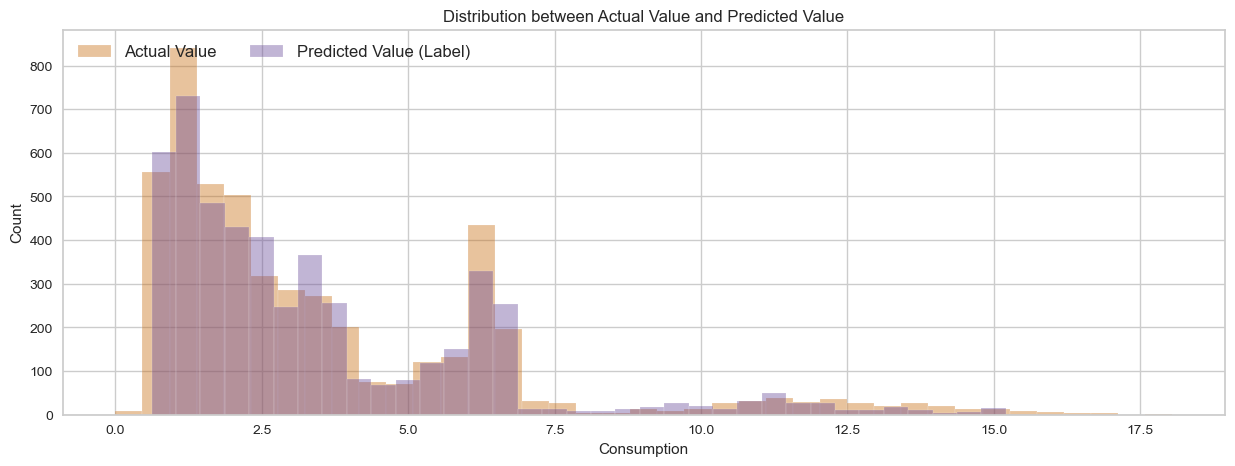

In [ ]:
# An interesting view is looking at the Actual Values and Predicted Values (Label) in a histogram over the entire dataset. This shows the distribution between the values. We can see how the Predicted Values seem to peak in a more distributed manner and skew to the left. 
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.distplot(predict_unseen["consumption"],
                kde=False,
                color="#c6690c")
sns.distplot(predict_unseen["prediction_label"],
                kde=False,
                color="#664697")
plt.title("Distribution between Actual Value and Predicted Value")
plt.ylabel("Count")
plt.xlabel("Consumption")
#plt.xlim((74,101))
plt.legend(('Actual Value', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)

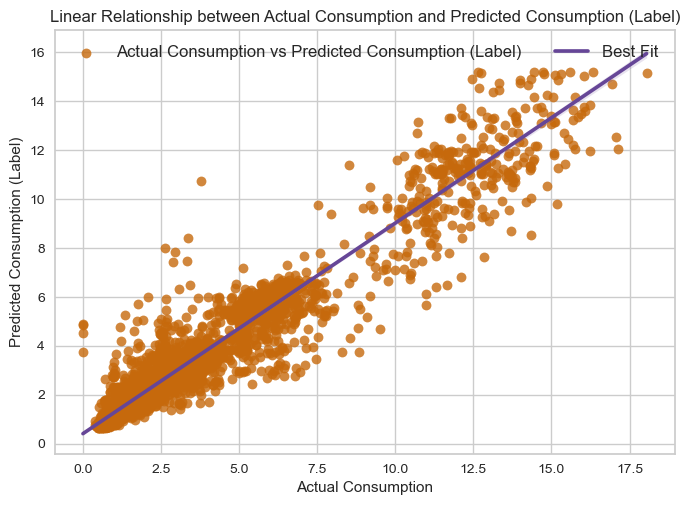

In [ ]:
# We can plot the Predicted Value (Label) vs Actual Value 
sns.regplot(x="consumption", y="prediction_label", data=predict_unseen, scatter_kws ={'s':50}, line_kws={"color": "#664697"}, color="#c6690c")
plt.title("Linear Relationship between Actual Consumption and Predicted Consumption (Label)")
plt.ylabel("Predicted Consumption (Label)")
plt.xlabel("Actual Consumption")
plt.legend(('Actual Consumption vs Predicted Consumption (Label)', 'Best Fit'), ncol=2, loc='upper left', fontsize=12)

In [ ]:
#Train the model on the whole training set
final_model = finalize_model(knn)
predictions = predict_model(final_model, data = pd_data)
predictions.to_csv('pred_final_blender.csv')
predictions.describe()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.2940,0.2726,0.5221,0.9716,0.1061,0.1081


,temperature,consumption,prediction_label
count,49494.000000,49494.000000,49494.000000
mean,6.554018,3.509242,3.498075
std,7.630100,3.096338,3.007989
min,-17.299999,0.000000,0.573747
25%,1.000000,1.263256,1.318215
50%,6.800000,2.376530,2.488980
75%,12.100000,5.189000,5.172479
max,30.500000,18.045012,15.591287


In [ ]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

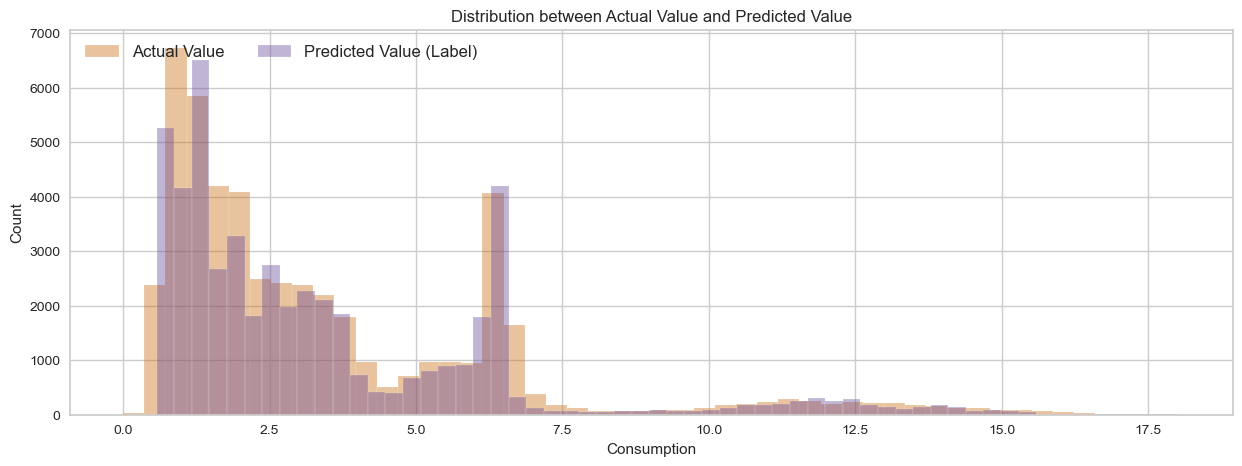

In [ ]:
# An interesting view is looking at the Actual Values and Predicted Values (Label) in a histogram over the entire dataset. This shows the distribution between the values. We can see how the Predicted Values seem to peak in a more distributed manner and skew to the left. 
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.distplot(predictions["consumption"],
                kde=False,
                color="#c6690c")
sns.distplot(predictions["prediction_label"],
                kde=False,
                color="#664697")
plt.title("Distribution between Actual Value and Predicted Value")
plt.ylabel("Count")
plt.xlabel("Consumption")
#plt.xlim((74,101))
plt.legend(('Actual Value', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)

In [ ]:
save_model(final_model, 'knn_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temperature'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['time', 'location'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['location'],
                                     transformer=OneHotEncoder(cols=['location'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['time'],
                                     transformer=TargetEncoder(cols=['time'],
                                                               hand

In [ ]:
#Sources
# https://nbviewer.org/github/pycaret/examples/blob/main/Pycaret_2.1_Regression_EmployeePerformance.ipynb